## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,  activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [13]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.1, 0.5, 0.9]
redice_lr_patient = [5, 10, 15]

In [14]:
import itertools

results = {}

for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.10, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_22 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_23 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 2s 38us/step - loss: 1.2329 - acc: 0.5737 - val_loss: 1.4778 - val_acc: 0.4836
Epoch 14/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.2084 - acc: 0.5806 - val_loss: 1.4704 - val_acc: 0.4837
Epoch 15/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.1860 - acc: 0.5893 - val_loss: 1.4767 - val_acc: 0.4791
Epoch 16/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.1622 - acc: 0.5984 - val_loss: 1.4716 - val_acc: 0.4863
Epoch 17/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.1382 - acc: 0.6082 - val_loss: 1.4594 - val_acc: 0.4900
Epoch 18/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.1175 - acc: 0.6164 - val_loss: 1.4580 - val_acc: 0.4921
Epoch 19/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.0941 - acc: 0.6251 - val_loss: 1.4547 - val_acc: 0.4919
Epoch 20/25
50000/50000 [=====================

50000/50000 [==============================] - 3s 56us/step - loss: 2.1631 - acc: 0.2766 - val_loss: 2.0497 - val_acc: 0.3200
Epoch 2/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.7264 - acc: 0.3941 - val_loss: 1.8018 - val_acc: 0.3878
Epoch 3/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.6063 - acc: 0.4366 - val_loss: 1.6860 - val_acc: 0.4082
Epoch 4/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.5328 - acc: 0.4630 - val_loss: 1.6317 - val_acc: 0.4263
Epoch 5/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.4792 - acc: 0.4830 - val_loss: 1.5797 - val_acc: 0.4444
Epoch 6/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.4356 - acc: 0.4995 - val_loss: 1.5602 - val_acc: 0.4498
Epoch 7/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.3956 - acc: 0.5145 - val_loss: 1.5475 - val_acc: 0.4588
Epoch 8/25
50000/50000 [============================

50000/50000 [==============================] - 2s 38us/step - loss: 1.1740 - acc: 0.5978 - val_loss: 1.4986 - val_acc: 0.4760
Epoch 25/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.1604 - acc: 0.6013 - val_loss: 1.4931 - val_acc: 0.4798
Numbers of exp: 5, reduce_factor: 0.50, reduce_patient: 15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_37 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalizati

Epoch 12/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.3792 - acc: 0.5201 - val_loss: 1.5656 - val_acc: 0.4520
Epoch 13/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.3579 - acc: 0.5280 - val_loss: 1.5556 - val_acc: 0.4504
Epoch 14/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.3374 - acc: 0.5367 - val_loss: 1.5425 - val_acc: 0.4567
Epoch 15/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.3187 - acc: 0.5435 - val_loss: 1.5315 - val_acc: 0.4614
Epoch 16/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.3001 - acc: 0.5495 - val_loss: 1.5299 - val_acc: 0.4611
Epoch 17/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.2821 - acc: 0.5588 - val_loss: 1.5239 - val_acc: 0.4597
Epoch 18/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.2649 - acc: 0.5638 - val_loss: 1.5183 - val_acc: 0.4608
Epoch 19/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 3s 64us/step - loss: 2.3818 - acc: 0.2261 - val_loss: 2.2792 - val_acc: 0.2774
Epoch 2/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.8745 - acc: 0.3527 - val_loss: 1.8934 - val_acc: 0.3591
Epoch 3/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.7384 - acc: 0.3944 - val_loss: 1.8247 - val_acc: 0.3710
Epoch 4/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.6613 - acc: 0.4186 - val_loss: 1.7287 - val_acc: 0.4006
Epoch 5/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.6055 - acc: 0.4371 - val_loss: 1.6877 - val_acc: 0.4096
Epoch 6/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.5630 - acc: 0.4533 - val_loss: 1.6505 - val_acc: 0.4178
Epoch 7/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.5255 - acc: 0.4672 - val_loss: 1.6244 - val_acc

50000/50000 [==============================] - 2s 39us/step - loss: 0.5854 - acc: 0.8158 - val_loss: 1.3913 - val_acc: 0.5423
Epoch 24/25
50000/50000 [==============================] - 2s 40us/step - loss: 0.5741 - acc: 0.8213 - val_loss: 1.4018 - val_acc: 0.5409

Epoch 00024: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 25/25
50000/50000 [==============================] - 3s 61us/step - loss: 0.5496 - acc: 0.8325 - val_loss: 1.3821 - val_acc: 0.5441
Numbers of exp: 10, reduce_factor: 0.10, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_52 (Batc (None, 512)               2048 

50000/50000 [==============================] - 2s 45us/step - loss: 1.4383 - acc: 0.5001 - val_loss: 1.5954 - val_acc: 0.4391
Epoch 11/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.4207 - acc: 0.5048 - val_loss: 1.5896 - val_acc: 0.4378
Epoch 12/25
50000/50000 [==============================] - 2s 45us/step - loss: 1.4027 - acc: 0.5130 - val_loss: 1.5839 - val_acc: 0.4467
Epoch 13/25
50000/50000 [==============================] - 2s 45us/step - loss: 1.3883 - acc: 0.5180 - val_loss: 1.5743 - val_acc: 0.4488
Epoch 14/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.3729 - acc: 0.5242 - val_loss: 1.5634 - val_acc: 0.4532
Epoch 15/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.3594 - acc: 0.5288 - val_loss: 1.5570 - val_acc: 0.4567
Epoch 16/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.3473 - acc: 0.5327 - val_loss: 1.5553 - val_acc: 0.4520
Epoch 17/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 76us/step - loss: 2.1409 - acc: 0.2880 - val_loss: 2.0050 - val_acc: 0.3322
Epoch 2/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.7559 - acc: 0.3918 - val_loss: 1.8058 - val_acc: 0.3802
Epoch 3/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.6585 - acc: 0.4231 - val_loss: 1.7397 - val_acc: 0.4025
Epoch 4/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.5980 - acc: 0.4427 - val_loss: 1.6914 - val_acc: 0.4155
Epoch 5/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.5548 - acc: 0.4580 - val_loss: 1.6618 - val_acc: 0.4231
Epoch 6/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.5203 - acc: 0.4710 - val_loss: 1.6474 - val_acc: 0.4272
Epoch 7/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.4916 - acc: 0.4814 - val_loss: 1.6262 - val_acc

50000/50000 [==============================] - 2s 39us/step - loss: 1.2579 - acc: 0.5681 - val_loss: 1.5041 - val_acc: 0.4747
Epoch 25/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.2490 - acc: 0.5718 - val_loss: 1.5039 - val_acc: 0.4734
Numbers of exp: 15, reduce_factor: 0.90, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_67 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalizati

Epoch 12/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.3967 - acc: 0.5167 - val_loss: 1.5754 - val_acc: 0.4508
Epoch 13/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.3816 - acc: 0.5213 - val_loss: 1.5727 - val_acc: 0.4556
Epoch 14/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.3679 - acc: 0.5277 - val_loss: 1.5684 - val_acc: 0.4542
Epoch 15/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.3541 - acc: 0.5333 - val_loss: 1.5618 - val_acc: 0.4589
Epoch 16/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.3406 - acc: 0.5382 - val_loss: 1.5529 - val_acc: 0.4628
Epoch 17/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.3289 - acc: 0.5423 - val_loss: 1.5520 - val_acc: 0.4624
Epoch 18/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.3165 - acc: 0.5472 - val_loss: 1.5458 - val_acc: 0.4635
Epoch 19/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 75us/step - loss: 1.8119 - acc: 0.3707 - val_loss: 1.9214 - val_acc: 0.3621
Epoch 2/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.5375 - acc: 0.4588 - val_loss: 2.1918 - val_acc: 0.3285
Epoch 3/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.4335 - acc: 0.4939 - val_loss: 2.8219 - val_acc: 0.2262
Epoch 4/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.3677 - acc: 0.5134 - val_loss: 2.2938 - val_acc: 0.2548
Epoch 5/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.2997 - acc: 0.5398 - val_loss: 1.9457 - val_acc: 0.3162
Epoch 6/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.2503 - acc: 0.5589 - val_loss: 1.8179 - val_acc: 0.3675
Epoch 7/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.2050 - acc: 0.5739 - val_loss: 2.3713 - val_acc

50000/50000 [==============================] - 2s 39us/step - loss: 0.7851 - acc: 0.7458 - val_loss: 1.5785 - val_acc: 0.4718
Epoch 24/25
50000/50000 [==============================] - 2s 38us/step - loss: 0.7614 - acc: 0.7536 - val_loss: 1.6528 - val_acc: 0.4495
Epoch 25/25
50000/50000 [==============================] - 2s 38us/step - loss: 0.7421 - acc: 0.7624 - val_loss: 1.8536 - val_acc: 0.4378
Numbers of exp: 20, reduce_factor: 0.10, reduce_patient: 15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_82 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_lay

Epoch 11/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.1298 - acc: 0.6125 - val_loss: 1.6154 - val_acc: 0.4342
Epoch 12/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.1000 - acc: 0.6238 - val_loss: 1.6024 - val_acc: 0.4436

Epoch 00012: ReduceLROnPlateau reducing learning rate to 5.0000002374872565e-05.
Epoch 13/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.0345 - acc: 0.6514 - val_loss: 1.4400 - val_acc: 0.4961
Epoch 14/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.0095 - acc: 0.6620 - val_loss: 1.4685 - val_acc: 0.4888
Epoch 15/25
50000/50000 [==============================] - 2s 40us/step - loss: 0.9897 - acc: 0.6696 - val_loss: 1.4424 - val_acc: 0.4935
Epoch 16/25
50000/50000 [==============================] - 2s 39us/step - loss: 0.9702 - acc: 0.6762 - val_loss: 1.4539 - val_acc: 0.4951
Epoch 17/25
50000/50000 [==============================] - 2s 38us/step - loss: 0.9529 - a

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 80us/step - loss: 2.4554 - acc: 0.1994 - val_loss: 2.2420 - val_acc: 0.2555
Epoch 2/25
50000/50000 [==============================] - 2s 39us/step - loss: 2.0923 - acc: 0.2923 - val_loss: 2.0873 - val_acc: 0.3028
Epoch 3/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.9433 - acc: 0.3364 - val_loss: 1.9797 - val_acc: 0.3345
Epoch 4/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.8483 - acc: 0.3638 - val_loss: 1.9026 - val_acc: 0.3564
Epoch 5/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.7804 - acc: 0.3856 - val_loss: 1.8444 - val_acc: 0.3731
Epoch 6/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.7299 - acc: 0.4003 - val_loss: 1.7934 - val_acc: 0.3836
Epoch 7/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.6856 - acc: 0.4175 - val_loss: 1.7646 - val_acc

50000/50000 [==============================] - 2s 40us/step - loss: 1.3588 - acc: 0.5316 - val_loss: 1.5890 - val_acc: 0.4484
Epoch 25/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.3464 - acc: 0.5359 - val_loss: 1.5795 - val_acc: 0.4517
Numbers of exp: 25, reduce_factor: 0.90, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_97 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalizat

Epoch 12/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.5503 - acc: 0.4612 - val_loss: 1.6764 - val_acc: 0.4162
Epoch 13/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.5281 - acc: 0.4692 - val_loss: 1.6622 - val_acc: 0.4221
Epoch 14/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.5079 - acc: 0.4745 - val_loss: 1.6547 - val_acc: 0.4224
Epoch 15/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.4885 - acc: 0.4835 - val_loss: 1.6399 - val_acc: 0.4283
Epoch 16/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.4695 - acc: 0.4892 - val_loss: 1.6376 - val_acc: 0.4298
Epoch 17/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.4532 - acc: 0.4947 - val_loss: 1.6193 - val_acc: 0.4319
Epoch 18/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.4368 - acc: 0.5004 - val_loss: 1.6135 - val_acc: 0.4377
Epoch 19/25
50000/50000 [=========

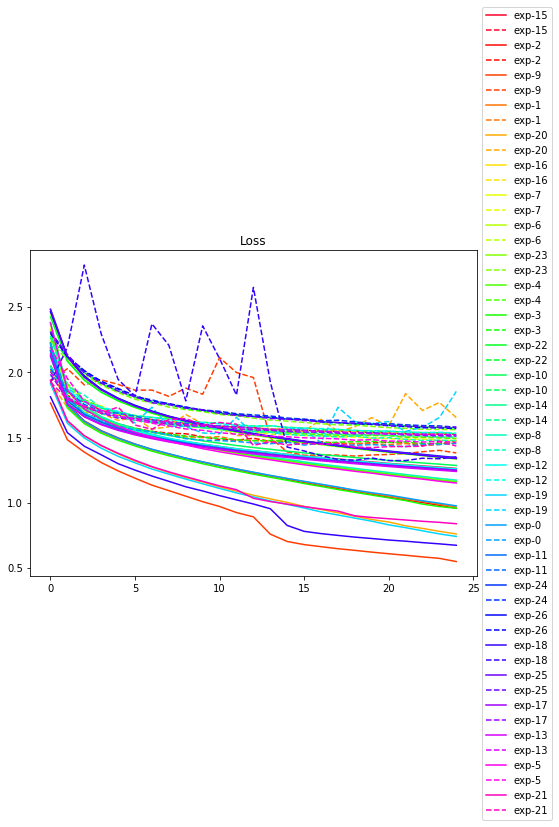

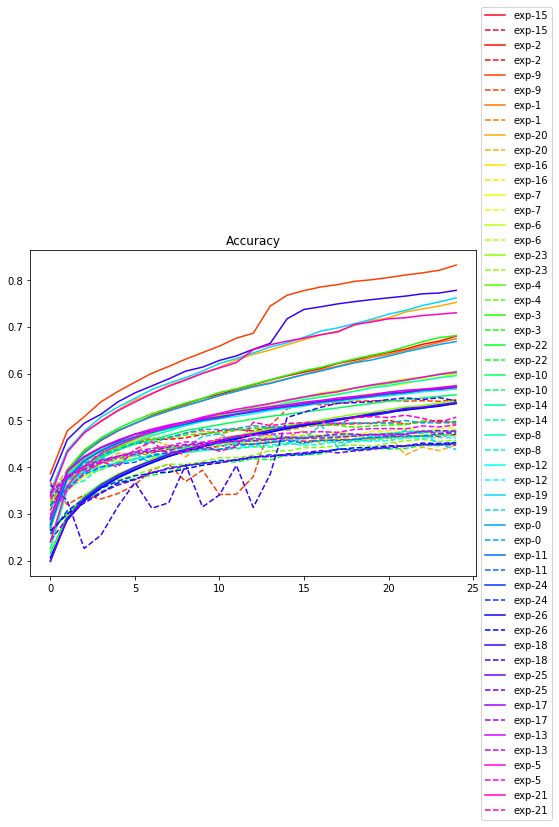

In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()